In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

In [2]:
# Reading the files
train = pd.read_csv('1train_data.csv')
test = pd.read_csv('1test_data.csv')
pd.set_option('display.max_colwidth', -1)

print('Column names: %s'%(train.columns))
print('Train length: %s'%(len(train)))
print('Test length: %s '%(len(test)))

Column names: Index(['sentiment', 'content'], dtype='object')
Train length: 30000
Test length: 10000 


In [3]:
train.tail(5)

,sentiment,content
29995,happiness,I had a great date last night...tried to find the CDCaves with Daniel it was HILARIOUSLY FUN!!!
29996,sadness,With alex
29997,happiness,@fureousangel that is comedy good luck my friend!
29998,fun,"stephs grad party gr8! shoved cake in her face, watchd sis bitch slap a boy, ate good food satisfied"
29999,happiness,@jesfive SWEEEEET - San Fran is awesome!!!! Love it there


In [4]:
# Tweets cleaning
import re
def clean_text(df,text_field):
    df[text_field] = df[text_field].str.lower()
    mystring = r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"
    # the first filter is capture everything eclosed that starts with an @
    # and that has any single character from the range A-Z or a-z or 0-9 with more
    # than one element inside of that
    # the second filter is capture everything that is not a number, a lower or upper
    # case letter after the last line
    df[text_field] = df[text_field].apply(lambda element: re.sub(mystring,"",element))
    return df

train_clean = clean_text(train,'content')
test_clean = clean_text(test,'content')
train_clean.tail()

,sentiment,content
29995,happiness,i had a great date last nighttried to find the cdcaves with daniel it was hilariously fun
29996,sadness,with alex
29997,happiness,that is comedy good luck my friend
29998,fun,stephs grad party gr8 shoved cake in her face watchd sis bitch slap a boy ate good food satisfied
29999,happiness,sweeeeet san fran is awesome love it there


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_clean['target'] = le.fit_transform(train_clean['sentiment'])
train_clean.tail()

,sentiment,content,target
29995,happiness,i had a great date last nighttried to find the cdcaves with daniel it was hilariously fun,5
29996,sadness,with alex,10
29997,happiness,that is comedy good luck my friend,5
29998,fun,stephs grad party gr8 shoved cake in her face watchd sis bitch slap a boy ate good food satisfied,4
29999,happiness,sweeeeet san fran is awesome love it there,5


In [6]:
print(list(set(train_clean['sentiment'])))

['anger', 'hate', 'enthusiasm', 'love', 'boredom', 'neutral', 'sadness', 'empty', 'fun', 'relief', 'worry', 'happiness', 'surprise']


<h2> Percentage </h2>

In [7]:
percentage = train_clean.groupby(['sentiment']).count()
percentage

,content,target
sentiment,,
anger,98,98
boredom,157,157
empty,659,659
enthusiasm,522,522
fun,1088,1088
happiness,2986,2986
hate,1187,1187
love,2068,2068
neutral,6340,6340


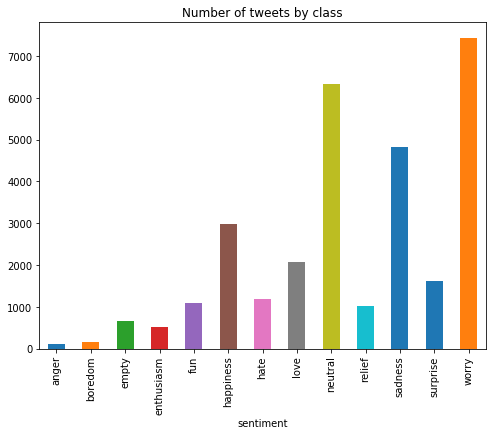

In [8]:
percentage['content'].plot(kind='bar', figsize=(8, 6), legend=False, title='Number of tweets by class')
plt.show()

In [9]:
labels = list(set(train_clean['sentiment']))
labels_inverse = le.inverse_transform(list((set(train_clean['target']))))
in_dict = {label:(len(train_clean[train_clean['sentiment'] == label]) / (len(train_clean)*1.))*100 for label in labels}

In [ ]:
#print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(train_clean),(len(train_clean[train_clean['label'] == 0]) / (len(train_clean)*1.))*100,(len(train_clean[train_clean['label'] == 1]) / (len(train_clean)*1.))*100))

In [10]:
labels

['anger',
 'hate',
 'enthusiasm',
 'love',
 'boredom',
 'neutral',
 'sadness',
 'empty',
 'fun',
 'relief',
 'worry',
 'happiness',
 'surprise']

In [12]:
in_dict

{'anger': 0.32666666666666666,
 'hate': 3.9566666666666666,
 'enthusiasm': 1.7399999999999998,
 'love': 6.8933333333333335,
 'boredom': 0.5233333333333334,
 'neutral': 21.133333333333333,
 'sadness': 16.093333333333334,
 'empty': 2.1966666666666668,
 'fun': 3.626666666666667,
 'relief': 3.4033333333333333,
 'worry': 24.776666666666667,
 'happiness': 9.953333333333333,
 'surprise': 5.376666666666666}

In [ ]:
#print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),(len(X_test[y_test == 0]) / (len(X_test)*1.))*100,(len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

<h2> Top $k$-Tokens </h2>

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(train_clean['content'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
for k in labels:
    print(k)

anger
hate
enthusiasm
love
boredom
neutral
sadness
empty
fun
relief
worry
happiness
surprise


In [15]:
le.inverse_transform(list((set(train_clean['target']))))

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [16]:
aqui = {str(lbl)+'_doc_matrix':cvec.transform(train_clean[train_clean['sentiment'] == lbl].content) for lbl in labels}

#neg_doc_matrix = cvec.transform(train_clean[train_clean['target'] == 0].content)
#pos_doc_matrix = cvec.transform(train_clean[train_clean['target'] == 1].content)

In [17]:
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

NameError: name 'neg_doc_matrix' is not defined

In [18]:
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

NameError: name 'neg_tf' is not defined

In [ ]:
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

In [ ]:
y_neg = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_neg, term_freq_df.sort_values(by='negative',ascending=False)['negative'][:50], align='center',alpha=0.5)
plt.xticks(y_neg,term_freq_df.sort_values(by='negative',ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

In [ ]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos,term_freq_df.sort_values(by='positive',ascending=False)['positive'][:50],align='center',alpha=0.5)
plt.xticks(y_pos,term_freq_df.sort_values(by='positive',ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')